In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Module.count import *
from Module.Curve_Fitting_MLE import *
from scipy.optimize import curve_fit
plt.style.use('classic')

In [2]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.
name = 'Human'
filename = name + '.txt' #change filename if you want to get statictical information of another

In [3]:
##text file.
big, syl, word, longest = info(filename, encode)

read file successfully!
Successfully count word freqency!(Human.txt)
Successfully count syl freqency!
Successfully build data frames!


<font color='blue' size='4'><b> Choose the best fit of FRD for syllgram </b><br></font>

/Users/lab/Downloads/Genetics-Linguistics-Correspondence/Scaling-linguistics/English/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** b
/Users/lab/Downloads/Genetics-Linguistics-Correspondence/Scaling-linguistics/English/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** b


the best fits is model Zipf-Mandelbrot


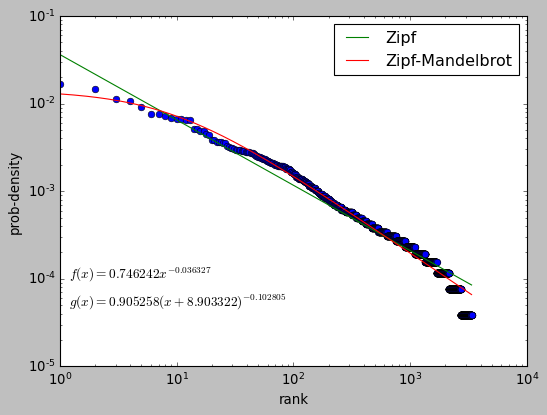

In [7]:
def FRD_plot(name, syl):
    '''draw FRD plot of syllgram

       parameters:
    0. name: str
       "XXX" (your file name without filename extension)

    1. syl: pd.daframe
       output of function info() or N_gram_info() in count.py
       you should get them from
       big, char, word, longest = info(filename, encode)
    '''
    sf = syl['sylFreq']
    max_sf = sf[0]

    #use MLE to get the fitting parameter, detial read: Curve_Fitting_MLE
    #-----------------------------------------
    T = ([],[]) #T = ([sylRank], [sylFreq])
    for i in syl['sylRank']:
        T[0].append(i)
    for i in sf:
        T[1].append(i)
    Y = Two_to_One(T)    
    aicc_index, aicc, Z_para, ZM_para = Z_ZM_choose(Y)

    #draw raw data
    N = sum(T[1])
    p = [i / N for i in T[1]]
    plt.plot(T[0], p, 'o')
    xdata = np.linspace(min(T[0]), max(T[0]), num = (max(T[0]) - min(T[0]))*10)
    
    #drawing fitting cruve
    s_Z, C_Z = Z_para[0], Z_para[1] 
    theo = Zipf_law(xdata, s_Z, C_Z)    
    plt.plot(xdata, theo, 'g-', label = 'Zipf')
    
    s_ZM, C_ZM, a_ZM = ZM_para[0], ZM_para[1], ZM_para[2] 
    theo = Zipf_Mandelbrot(xdata, s_ZM, C_ZM, a_ZM)
    plt.plot(xdata, theo, 'r-', label = 'Zipf-Mandelbrot')
    
    #show equation
    plt.text(1.2, 10**(-4),'$f(x)=%fx^{-%f}$'%(C_Z, s_Z), fontsize=12)
    plt.text(1.2, 0.5*10**(-4),'$g(x)=%f(x+%f)^{-%f}$'%(C_ZM, a_ZM, s_ZM), fontsize=12)
    
    plt.legend(loc = 'best')
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel('prob-density')
    plt.xlabel('rank')
    plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
    plt.show()
    
    
FRD_plot(name, syl)